In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data = pd.read_csv("../data/RGI2000-v7.0-G-01_alaska-attributes.csv")
print(data.head())

                    rgi_id  o1region o2region        glims_id  anlys_id  \
0  RGI2000-v7.0-G-01-00001         1    01-01  G204091E67414N    392889   
1  RGI2000-v7.0-G-01-00002         1    01-01  G204121E67419N    392890   
2  RGI2000-v7.0-G-01-00003         1    01-01  G204471E67431N    392897   
3  RGI2000-v7.0-G-01-00004         1    01-01  G204497E67431N    392899   
4  RGI2000-v7.0-G-01-00005         1    01-01  G204521E67429N    392901   

   subm_id             src_date      cenlon     cenlat  utm_zone  ...  \
0      624  2008-09-02T00:00:00 -155.909404  67.413726         5  ...   
1      624  2008-09-02T00:00:00 -155.879114  67.419232         5  ...   
2      624  2008-09-02T00:00:00 -155.530786  67.431484         5  ...   
3      624  2008-09-02T00:00:00 -155.501948  67.430514         5  ...   
4      624  2008-09-02T00:00:00 -155.478173  67.432873         5  ...   

     termlat     zmin_m     zmax_m     zmed_m    zmean_m  slope_deg  \
0  67.416034  1485.3176  1693.6235  154

In [58]:
filtered_columns = data[['area_km2','zmean_m', 'slope_deg', 'aspect_deg',
                        'surge_type', 'term_type', 'lmax_m']]
print(filtered_columns.head())

   area_km2    zmean_m  slope_deg  aspect_deg  surge_type  term_type  lmax_m
0  0.239199  1553.9403  17.606613  342.330469           0          9     725
1  0.104641  1330.9150  19.846369  345.367012           0          9     484
2  0.216605  1437.2352  23.690063   13.467490           0          9    1099
3  0.252649  1249.0662  12.782562   42.854332           0          9     652
4  0.474716  1273.7834  17.148510  299.058193           0          9    1903


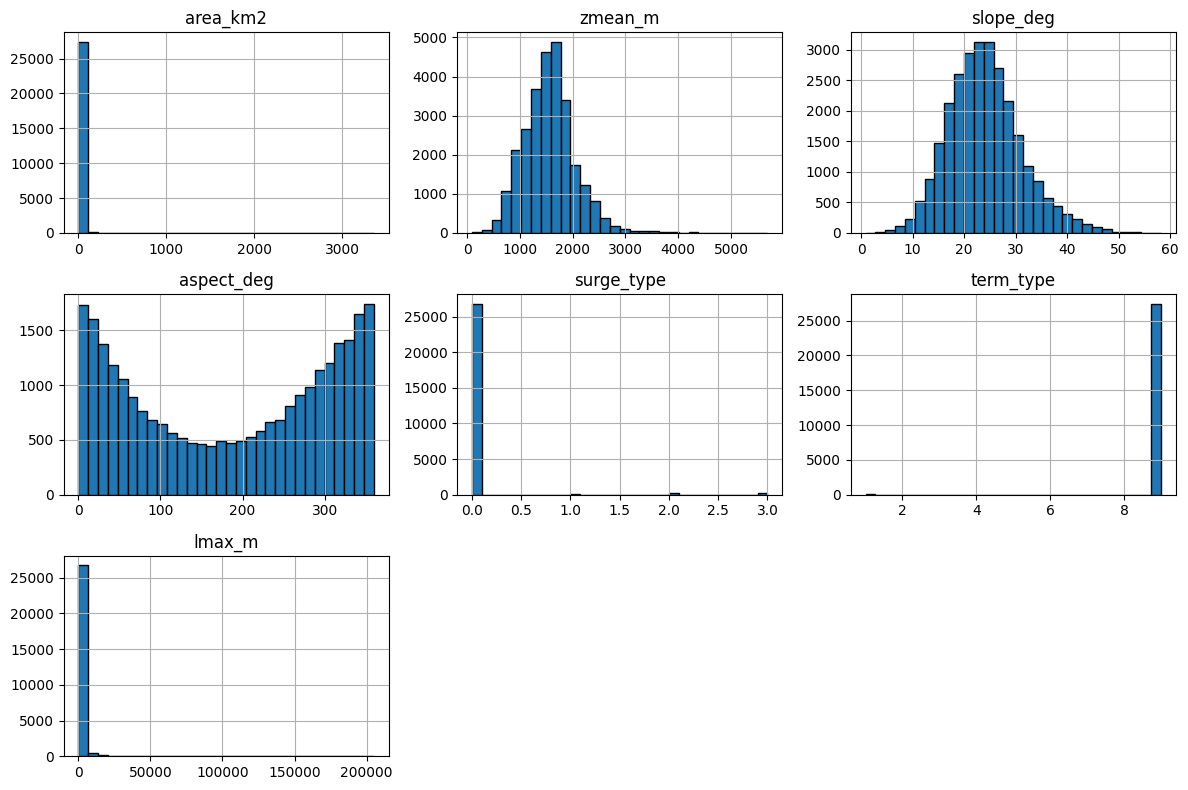

In [59]:
filtered_columns.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

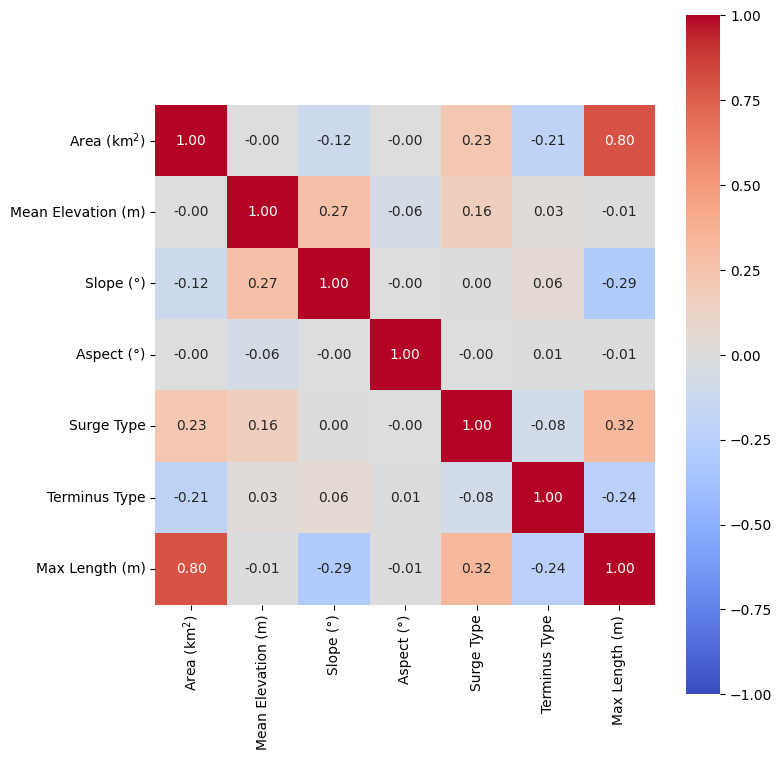

In [60]:
## Correlation coefficient matrix

corr_matrix = filtered_columns.corr()

# Create LaTeX formatted labels for axes
latex_labels = {
    'area_km2': r'Area (km$^2$)',
    'zmin_m': r'Min Elevation (m)',
    'zmax_m': r'Max Elevation (m)',
    'zmean_m': r'Mean Elevation (m)',
    'slope_deg': r'Slope (°)',
    'aspect_deg': r'Aspect (°)',
    'primeclass': r'Prime Class',
    'conn_lvl': r'Connectivity Level',
    'surge_type': r'Surge Type',
    'term_type': r'Terminus Type',
    'lmax_m': r'Max Length (m)'
}

latex_cols = [latex_labels[col] for col in filtered_columns.columns]

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, ax=ax, square=True,
            xticklabels=latex_cols, yticklabels=latex_cols)
plt.tight_layout()
plt.show()

In [61]:
glaciers = filtered_columns.dropna()
glacier_centered = glaciers - glaciers.mean()

In [62]:
U, S, Vt = np.linalg.svd(glacier_centered, full_matrices=False)

# Project data onto principal components (scores)
pca_result = U * S

# Calculate explained variance ratio
explained_variance = (S ** 2) / (len(glacier_centered) - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()

# What proportion is variance is explained by each PC?
print("Explained variance:")
for i, var in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")

Explained variance:
  PC1: 0.9847 (98.47%)
  PC2: 0.0144 (1.44%)
  PC3: 0.0009 (0.09%)
  PC4: 0.0000 (0.00%)
  PC5: 0.0000 (0.00%)
  PC6: 0.0000 (0.00%)
  PC7: 0.0000 (0.00%)


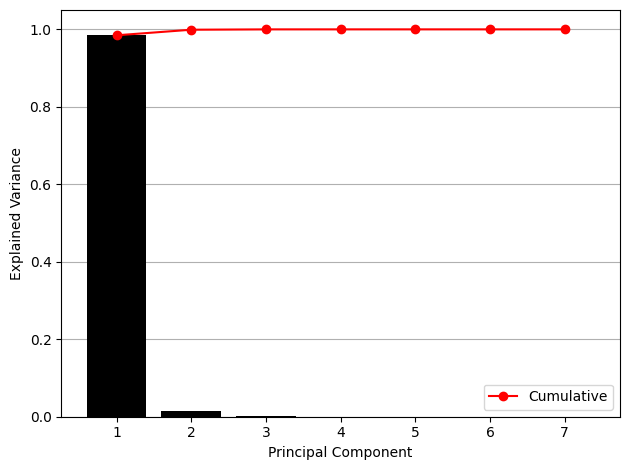

In [63]:
# We can also create a *scree* plot of pcs

fig, ax = plt.subplots()
ax.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, 
       color='black')
ax.plot(range(1, len(explained_variance_ratio)+1), np.cumsum(explained_variance_ratio), 
        'ro-', label='Cumulative')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
ax.set_xticks(range(1, len(explained_variance_ratio)+1))
ax.legend()
ax.grid(True, axis='y')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

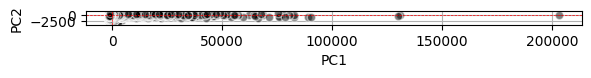

In [64]:
fig, ax = plt.subplots()
ax.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, color='k', edgecolors='w')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.axhline(y=0, color='r', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='r', linestyle='--', linewidth=0.5)
ax.set_aspect('equal')
ax.grid(True)
ax.set_axisbelow(True)
plt.show()

In [65]:
# What makes up each PC?

# Loadings (principal component vectors) are the rows of Vt
loadings = pd.DataFrame(Vt.T, index=glacier_centered.columns, columns=[f'PC{i+1}' for i in range(len(glacier_centered.columns))])
print("\nLoadings for PC1 and PC2:")
print(loadings[['PC1', 'PC2']])


Loadings for PC1 and PC2:
                 PC1       PC2
area_km2    0.008133 -0.000286
zmean_m    -0.001079 -0.999863
slope_deg  -0.000513 -0.003948
aspect_deg -0.000344  0.016040
surge_type  0.000029 -0.000123
term_type  -0.000021 -0.000020
lmax_m      0.999966 -0.001073


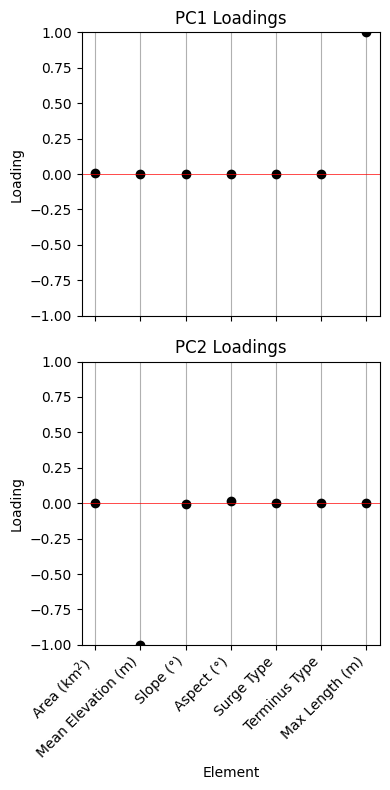

In [66]:
# Why don't we visualize these loadings?
fig, axes = plt.subplots(2, 1, figsize=(4, 8), sharex=True)
x = np.arange(len(glacier_centered.columns))
latex_cols = [latex_labels[col] for col in glacier_centered.columns]

# PC1 loadings
ax1 = axes[0]
ax1.scatter(x, loadings['PC1'], color='black')
ax1.set_ylabel('Loading')
ax1.axhline(y=0, color='r', linestyle='-', linewidth=0.5)
ax1.set_ylim(-1, 1)
ax1.grid(True, axis='x')
ax1.set_axisbelow(True)
ax1.set_title('PC1 Loadings')

# PC2 loadings
ax2 = axes[1]
ax2.scatter(x, loadings['PC2'], color='black')
ax2.set_ylabel('Loading')
ax2.set_xlabel('Element')
ax2.set_xticks(x)
ax2.set_xticklabels(latex_cols, rotation=45, ha='right')
ax2.axhline(y=0, color='r', linestyle='-', linewidth=0.5)
ax2.set_ylim(-1, 1)
ax2.grid(True, axis='x')
ax2.set_axisbelow(True)
ax2.set_title('PC2 Loadings')

plt.tight_layout()
plt.show()

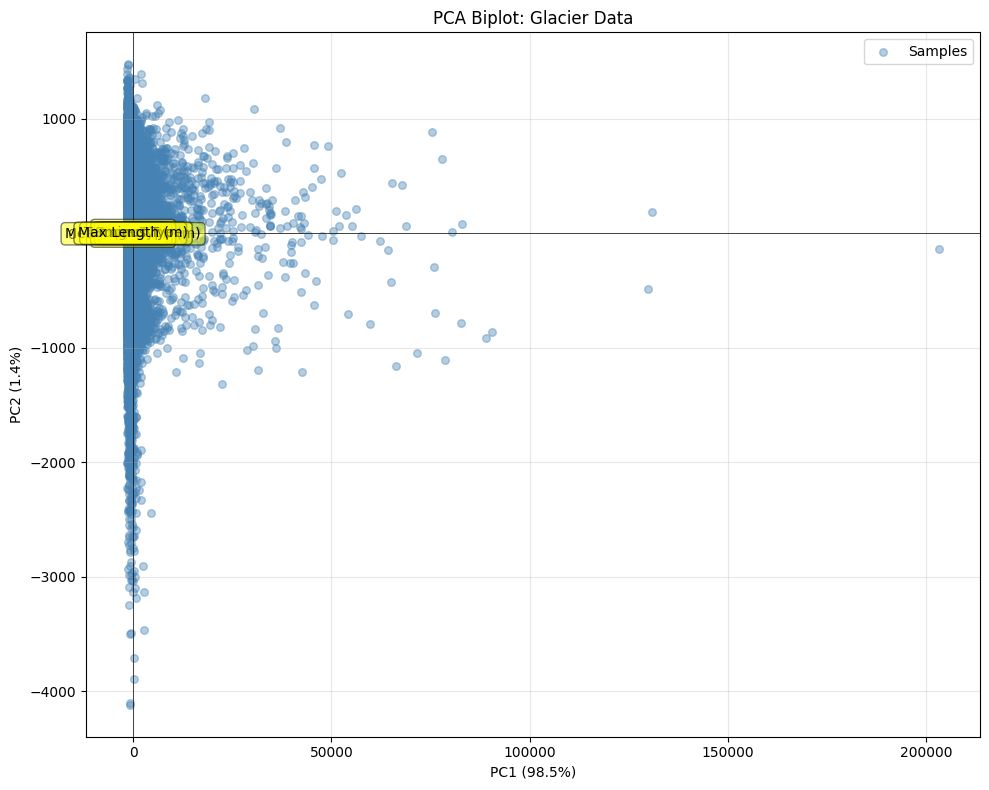

In [67]:
# Create a biplot combining scores and loadings
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the scores (data points)
ax.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.4, color='steelblue', s=30, label='Samples')

# Plot the loadings (variable vectors)
scale_factor = 3.5  # Scale factor for visibility
for i, col in enumerate(glacier_centered.columns):
    ax.arrow(0, 0, loadings['PC1'].iloc[i]*scale_factor, loadings['PC2'].iloc[i]*scale_factor,
             head_width=0.15, head_length=0.15, fc='red', ec='red', alpha=0.7)
    ax.text(loadings['PC1'].iloc[i]*scale_factor*1.15, loadings['PC2'].iloc[i]*scale_factor*1.15, 
            latex_labels[col], fontsize=10, ha='center', va='center', 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}%)')
ax.set_title('PCA Biplot: Glacier Data')
ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()